In [1]:
import numpy as np
#import numpy.matlib
from scipy import io
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import svm, metrics

In [2]:
mat = io.loadmat('digit.mat');
X=mat['X'];
T=mat['T'];
d=np.size(X,0);m=np.size(X,1);c=np.size(X,2);
X=X.reshape(d,m*c,order='F').copy();
Y=np.kron(np.ones((m,1)),range(1,c+1)).reshape(m*c,order='F')
ks=range(1,10+1);t=5; v=np.mod(np.random.permutation(m*c)+1,t)+1;

[d,r,c]=T.shape;
T=T.reshape(d,r*c,order='F').copy()
Y2=np.kron(np.ones((r,1)),range(1,c+1)).reshape(r*c,order='F')

In [3]:
classifier = svm.SVC(gamma=0.01)
classifier.fit(X.T, Y.T)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

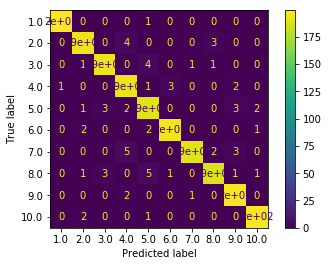

In [4]:
disp = metrics.plot_confusion_matrix(classifier,T.T , Y2);

In [5]:
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

Confusion matrix:
[[199   0   0   0   1   0   0   0   0   0]
 [  0 193   0   4   0   0   0   3   0   0]
 [  0   1 193   0   4   0   1   1   0   0]
 [  1   0   0 193   1   3   0   0   2   0]
 [  0   1   3   2 189   0   0   0   3   2]
 [  0   2   0   0   2 195   0   0   0   1]
 [  0   0   0   5   0   0 190   2   3   0]
 [  0   1   3   0   5   1   0 188   1   1]
 [  0   0   0   2   0   0   1   0 197   0]
 [  0   2   0   0   1   0   0   0   0 197]]


In [6]:
np.sum(np.diag(disp.confusion_matrix),0)/np.sum(np.sum(disp.confusion_matrix))

0.967